In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
def price_sq(x):
  #if div by 20 then x 50
  return x//50

In [34]:
def OLS(Y,Y_hat):
  N = Y_hat.shape[0]
  return ((1/2*N)*np.sum(Y-Y_hat)**2)

In [35]:
def MAE(Y, Y_hat):
  return np.sum(np.abs((Y-Y_hat)))/len(Y)

def R2(Y,Y_hat):
  N=len(Y)
  return 1-((np.sum((Y-Y_hat)**2)/np.sum((Y_hat-np.mean(Y))**2)))

def OLS(Y, Y_hat, N):
  return ((1/(2*N))*np.sum((Y-Y_hat)**2))

In [36]:
class MVLinearRegression():
  def fit(self,X,y,eta=1e-3,epochs=1e-3,show_curve=True):
    epochs=int(epochs)
    N,D = X.shape
    Y=y
    #Begin Optimization
    self.W = np.random.randn(D)
    self.J = np.zeros(epochs)
    #Start Gradient Descent Progression
    for epoch in range(epochs):
      Y_hat = self.predict(X)
      self.J[epoch]=OLS(Y,Y_hat,N)
      #weights update rule
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))
    if show_curve:
      plt.figure()
      plt.plot(self.J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal")
  def predict(self,X):
    return X@self.W


<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-2216283314.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mathcal")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train R2: nan
Train MAE: 0.0
Test R2: nan
Test MAE: 0.0


/tmp/ipython-input-2616363652.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return 1-((np.sum((Y-Y_hat)**2)/np.sum((Y_hat-np.mean(Y))**2)))


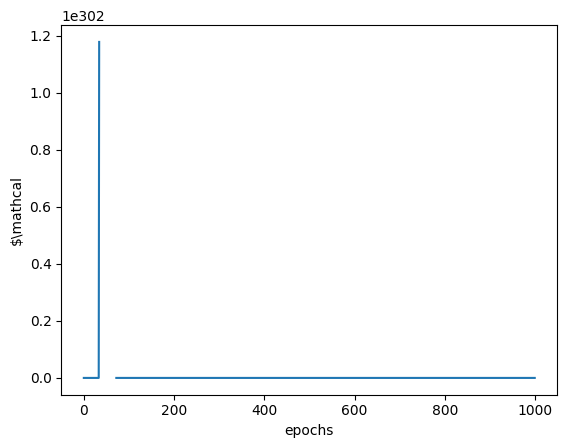

In [37]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# -------------------------------------------------------------
# Analytical Linear Regression (Normal Equation)
# -------------------------------------------------------------
df = pd.read_csv("/content/drive/MyDrive/ds/cleaned_final.csv")
# -------------------------------------------------------------
# Analytical Linear Regression (Normal Equation)
# -------------------------------------------------------------



# -------------------------------------------------------------
# Train/test split (recommended)
# -------------------------------------------------------------

target='sold_price'
categorical_features=['year_built']
numeric_features=['bathrooms','garage','sqrt_ft','lot_acres','HOA']
X = df[numeric_features+categorical_features]
y = df[target]


X_train,X_test=X.iloc[:4000],X.iloc[4000:]
# print(X_train,X_test)
y_train,y_test=y.iloc[:4000],y.iloc[4000:]

# Log-transform target
# y_train_scaled = np.log1p(y_train)
# y_test_scaled  = np.log1p(y_test)

# -------------------------------------------------------------
# Train model using closed-form solution
# -------------------------------------------------------------
model=MVLinearRegression()
model.fit(X,y,eta=1e-3,epochs=1e3)
y_hat_train = model.predict(X_train)
y_hat_test  = model.predict(X_test)
print("Train R2:", R2(y_train, y_hat_train))
print("Train MAE:", MAE(y_train, y_hat_train))

print("Test R2:", R2(y_test, y_hat_test))
print("Test MAE:", MAE(y_test, y_hat_test))
